# Demo of Data Analysis in Python

This is a "notebook", which is a kind of file that includes code (in our case, Python) along with helpful notes written in human language, to help people understand the data analysis steps.  We create "cells" which can hold text like this which is meant for people (these are called "markdown" cells) or can hold code meant for the computer (these are called "code" cells).  We can add, move, or delete cells, and we can run the code in just one cell, or choose to run all the cells in order.  There are lots of ways to build notebooks and work with them!

## Load Packages

The first thing we have to do is load some "packages" or "libraries" (you'll hear people call them different things).  Packages are optional extras that expand what Python can do.  There are thousands of packages, and you only want to load the handful you'll actually use during an analysis.  In our case, we want to use "pandas" (it's traditionally abbreviated "pd") to work with data and the "seaborn" package to visualize (graph) data.  Seaborn is based on a package called "matplotlib", and sometimes we need to get into the guts of matplotlib to change up the appearance of our graphs, so we'll load it as well.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

We need to work with data!  In our case, we're going to work with a very common kind of data called "csv".  A csv file, or "comma separated values" file, contains information organized in rows and columns.  If you try to open a csv file by double clicking on it from your computer, it will probably open in Microsoft Excel, if you have that installed.  But there are lots of other ways to work with csv files and other data that is stored in rows and columns.  In Python, the pandas package is very good at working with data that is organized in rows and columns.

I got a link to my data by using the "API" button on this page: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam.  The website I'm getting this data from is set up to only deliver 1000 rows of data by default, so I'm going to add an extra bit of text to the link ("$limit") to say "give me up to ten thousand rows of data".

I'm going to use that link and ingest the data there (ingest means "go get something and bring it into my current work", and call that data "nyc_death_data", because that's a short and memorable name that describes the data.  I could also just call it "my_data", but that's not a good descriptor!

In [11]:
nyc_death_data = pd.read_csv("https://data.cityofnewyork.us/resource/jb7j-dtam.csv?$limit=10000")

# Look at the Data

The first thing I want to do is look around at the data, and get an idea for what it looks like.  I'll use commands from the "pandas" library (which we're abbreviating as "pd") to look at the first few rows, then the last few rows.

In [12]:
nyc_death_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Other Race/ Ethnicity,63,.,.
1,2014,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,165,13.8,20.4
2,2014,Cerebrovascular Disease (Stroke: I60-I69),M,Other Race/ Ethnicity,7,.,.
3,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1281,107.3,170.5
4,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Other Race/ Ethnicity,68,.,.


In [13]:
nyc_death_data.tail()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
1089,2007,Diabetes Mellitus (E10-E14),F,Hispanic,205,17.6,22.6
1090,2007,Chronic Lower Respiratory Diseases (J40-J47),F,White Non-Hispanic,472,32.9,19.6
1091,2007,Human Immunodeficiency Virus Disease (HIV: B20...,M,Hispanic,218,20,23.1
1092,2007,All Other Causes,F,Not Stated/Unknown,27,.,.
1093,2007,"Assault (Homicide: Y87.1, X85-Y09)",M,Other Race/ Ethnicity,.,.,.


I can also get an idea for what values are represented in my data using the "value_counts" command and passing along the name of a column:

In [19]:
nyc_death_data.value_counts("year")

year
2007    141
2011    141
2010    138
2008    136
2014    136
2009    135
2012    134
2013    133
dtype: int64

It can be important to know what the type of data is for each column.  For example, is the "deaths" column an integer?

In [20]:
nyc_death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     1094 non-null   int64 
 1   leading_cause            1094 non-null   object
 2   sex                      1094 non-null   object
 3   race_ethnicity           1094 non-null   object
 4   deaths                   1094 non-null   object
 5   death_rate               1094 non-null   object
 6   age_adjusted_death_rate  1094 non-null   object
dtypes: int64(1), object(6)
memory usage: 60.0+ KB


Oh no!  Everything except for year is listed as an "object", which means it's "string" data (alphanumeric text).  We need to make sure that columns that contain numbers are of a data type that's numeric.  Let's do some conversion.

# Clean and Prepare Data

In [21]:
nyc_death_data['deaths'] = pd.to_numeric(nyc_death_data['deaths'])

ValueError: Unable to parse string "." at position 20

Whoops, we got our first error code.  If we look at the error, it looks like maybe one of our rows has just the value "." in it, to mean nothing?  Or zero?  It says it's at "position 20".  Maybe that means row 20?  Let's peek at the "index location" ("iloc") 20!

In [23]:
nyc_death_data.iloc[20]

year                                                                 2014
leading_cause              Chronic Liver Disease and Cirrhosis (K70, K73)
sex                                                                     F
race_ethnicity                                         Not Stated/Unknown
deaths                                                                  .
death_rate                                                              .
age_adjusted_death_rate                                                 .
Name: 20, dtype: object

It sure seems like "." is supposed to just be "nothing"... zero, or absent data.  Let's replace "." with "NA", which stands for "not a number" or "not applicable", which is Python-speak for a missing or null value.

In [25]:
nyc_death_data = nyc_death_data.replace('.',pd.NA)

Let's try again, and see if we can convert "deaths" to being numeric!

In [27]:
nyc_death_data['deaths'] = pd.to_numeric(nyc_death_data['deaths'])

No error this time!  Let's look at our data types now:

In [28]:
nyc_death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1094 non-null   int64  
 1   leading_cause            1094 non-null   object 
 2   sex                      1094 non-null   object 
 3   race_ethnicity           1094 non-null   object 
 4   deaths                   956 non-null    float64
 5   death_rate               708 non-null    object 
 6   age_adjusted_death_rate  708 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 60.0+ KB


OK, great, this is a "float", or decimal type.  That's good enough.  We should also do a conversion to numeric type for the death rate columns.

In [29]:
nyc_death_data['death_rate'] = pd.to_numeric(nyc_death_data['death_rate'])
nyc_death_data['age_adjusted_death_rate'] = pd.to_numeric(nyc_death_data['age_adjusted_death_rate'])

Let's check the data type again!

In [54]:
nyc_death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1094 non-null   int64  
 1   leading_cause            1094 non-null   object 
 2   sex                      1094 non-null   object 
 3   race_ethnicity           1094 non-null   object 
 4   deaths                   956 non-null    float64
 5   death_rate               708 non-null    float64
 6   age_adjusted_death_rate  708 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 60.0+ KB


,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Other Race/ Ethnicity,63.0,NaN,NaN
1,2014,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,165.0,13.8,20.4
2,2014,Cerebrovascular Disease (Stroke: I60-I69),M,Other Race/ Ethnicity,7.0,NaN,NaN
3,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1281.0,107.3,170.5
4,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Other Race/ Ethnicity,68.0,NaN,NaN
...,...,...,...,...,...,...,...
1089,2007,Diabetes Mellitus (E10-E14),F,Hispanic,205.0,17.6,22.6
1090,2007,Chronic Lower Respiratory Diseases (J40-J47),F,White Non-Hispanic,472.0,32.9,19.6
1091,2007,Human Immunodeficiency Virus Disease (HIV: B20...,M,Hispanic,218.0,20.0,23.1
1092,2007,All Other Causes,F,Not Stated/Unknown,27.0,NaN,NaN


# Visualize The Data

There are 1094 rows of data and that's a lot to consider!  Sometimes data is easier to understand if we make graphs to show the data.  There are lots of ways to create exploratory data visualizations in Python.  In this case I'm going to make a series of bar charts using the seaborn package.

This is just going to be an exploratory graph.  It's not perfect, and it's not intended for publication.  It's meant for us to get a quick overview of the data in order to generate new questions!  We want to look at death rate within race/sex (presumably, per thousand people in the race/sex category) to look for disparities.

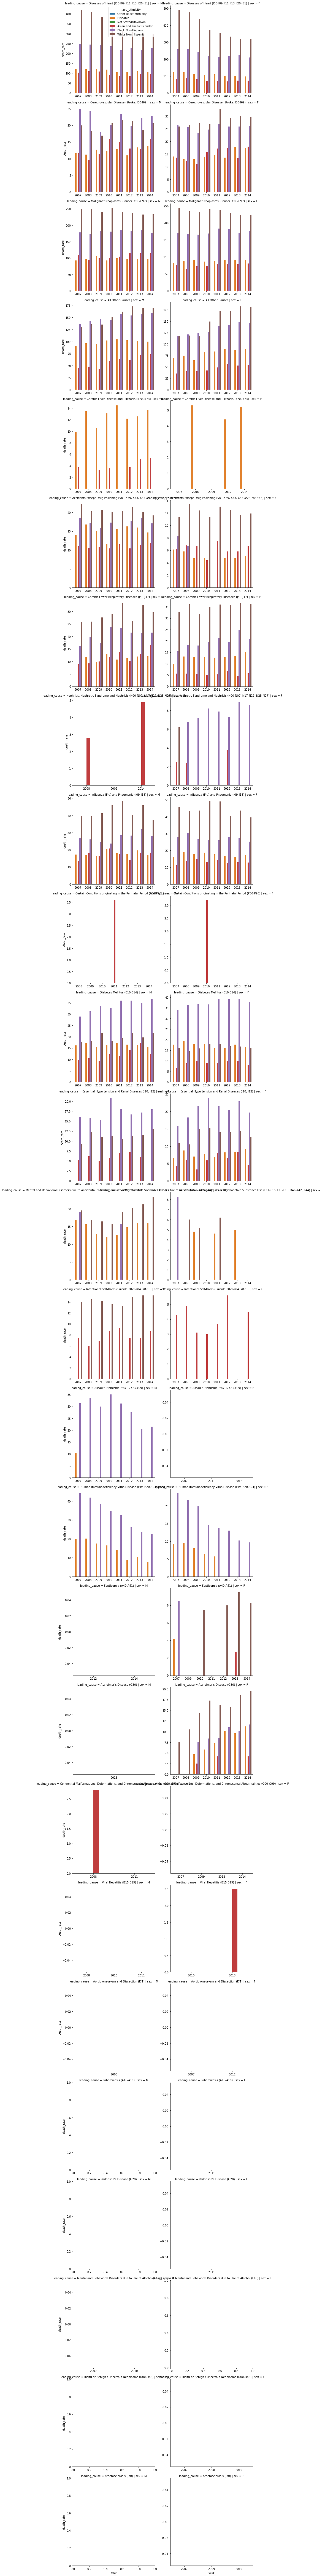

In [53]:
sns.catplot(x = "year",             # x variable: year
            y = "death_rate",       # y variable: death rate within sex/race
            hue = "race_ethnicity", # grouped bar variable: race
            data = nyc_death_data,  # dataframe to plot
            row = "leading_cause",  # make a plot for each leading cause
            col = "sex",            # and split it out by M/F
            kind = "bar",           # make it a bar plot
            legend_out = False,     # optional: show legend at the top instead of 
                                    #           way down in the middle
            sharex = False,         # make the x axis independent (show labels!)
            sharey = False)         # make the y axis independent (show labels!)

So, this is a clunky visualization, but it gives us interesting questions.  For example, we see:

* Higher rates in white people caused by heart disease and respiratory illness.
* Higher death rates in Black people caused by renal disease and diabetes.
* Higher death rates in males caused by homicide and suicide.
* Decreasing death rates from septicemia over time.
* Increasing death rates from Alzheimer's over time.

There are a number of missing death rates. If we wanted to, we could use census data to estimate the population of each group for each year and create our own death rates... but for now let's not worry about the missing death rates (which may be missing because they are effectively zero).


# Subsetting Data

Let's say we want to work with data relating to Septicemia.  We can get just the data related to that cause of death.  First, let's remind ourselves of the various causes of death in our data by using the "unique" method to show us all the unique values in the "leading_cause" column.

In [55]:
nyc_death_data["leading_cause"].unique()

array(['Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Malignant Neoplasms (Cancer: C00-C97)', 'All Other Causes',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Diabetes Mellitus (E10-E14)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Assault (Homicide: Y87.1, X85-Y09)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Septicemia (A40

We can subset our data by saying "just give me the rows of nyc_death_data where the leading_cause is 'Septicemia (A40-A41)'."

In [56]:
septicemia_deaths = nyc_death_data[nyc_death_data["leading_cause"] == "Septicemia (A40-A41)"]
septicemia_deaths

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
52,2014,Septicemia (A40-A41),M,Not Stated/Unknown,8.0,NaN,NaN
130,2014,Septicemia (A40-A41),F,White Non-Hispanic,118.0,8.3,4.7
136,2013,Septicemia (A40-A41),F,White Non-Hispanic,135.0,9.5,5.0
138,2013,Septicemia (A40-A41),F,Asian and Pacific Islander,16.0,2.7,2.9
283,2012,Septicemia (A40-A41),F,Other Race/ Ethnicity,NaN,NaN,NaN
328,2012,Septicemia (A40-A41),M,Other Race/ Ethnicity,6.0,NaN,NaN
386,2012,Septicemia (A40-A41),F,White Non-Hispanic,113.0,8.0,4.2
457,2011,Septicemia (A40-A41),F,Not Stated/Unknown,NaN,NaN,NaN
572,2010,Septicemia (A40-A41),F,White Non-Hispanic,107.0,7.5,4.3
675,2010,Septicemia (A40-A41),F,Not Stated/Unknown,NaN,NaN,NaN


And we might want to get a total of *all* deaths by all causes so we can compare relative rates... that brings us to using "groupby" and "aggregation" functions in pandas:

In [62]:
all_causes = nyc_death_data.groupby(["sex", "race_ethnicity"]).agg(total_deaths=('deaths', 'sum'))
all_causes

total_deaths
sex race_ethnicity                          
F   Asian and Pacific Islander       11791.0
    Black Non-Hispanic               58812.0
    Hispanic                         35908.0
    Not Stated/Unknown                1708.0
    Other Race/ Ethnicity              993.0
    White Non-Hispanic              107859.0
M   Asian and Pacific Islander       14564.0
    Black Non-Hispanic               52304.0
    Hispanic                         38894.0
    Not Stated/Unknown                2391.0
    Other Race/ Ethnicity             1146.0
    White Non-Hispanic               98628.0

This layout of our data isn't what we're used to, because it's a grouped data frame.  We can flatten it down to what we're used to seeing using "reset_index".

In [63]:
all_causes = all_causes.reset_index()
all_causes

,sex,race_ethnicity,total_deaths
0,F,Asian and Pacific Islander,11791.0
1,F,Black Non-Hispanic,58812.0
2,F,Hispanic,35908.0
3,F,Not Stated/Unknown,1708.0
4,F,Other Race/ Ethnicity,993.0
5,F,White Non-Hispanic,107859.0
6,M,Asian and Pacific Islander,14564.0
7,M,Black Non-Hispanic,52304.0
8,M,Hispanic,38894.0
9,M,Not Stated/Unknown,2391.0
